In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('BTC-USD.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-24,11663.689453,11807.631836,11623.250000,11774.595703,11774.595703,2.068151e+10
1,2020-08-25,11773.588867,11778.299805,11189.850586,11366.134766,11366.134766,2.630151e+10
2,2020-08-26,11366.894531,11530.052734,11296.993164,11488.363281,11488.363281,2.246666e+10
3,2020-08-27,11485.608398,11570.786133,11185.941406,11323.397461,11323.397461,2.324042e+10
4,2020-08-28,11325.295898,11545.615234,11316.422852,11542.500000,11542.500000,1.980713e+10


In [4]:
data.dropna(inplace=True)

In [5]:
close = data['Close']

In [6]:
close

0      11774.595703
1      11366.134766
2      11488.363281
3      11323.397461
4      11542.500000
           ...     
361    49339.175781
362    48905.492188
363    49321.652344
364    49546.148438
365    49754.507813
Name: Close, Length: 363, dtype: float64

In [7]:
close_yest =close.shift()
close_2d =close.shift(2)
close_3d =close.shift(3)

In [8]:
close_yest.loc[0]= close_yest.loc[1]

close_2d.loc[0]= close_2d.loc[2]
close_2d.loc[1]= close_2d.loc[2]

close_3d.loc[0]= close_3d.loc[3]
close_3d.loc[1]= close_3d.loc[3]
close_3d.loc[2]= close_3d.loc[3]

In [9]:
close_yest

0      11774.595703
1      11774.595703
2      11366.134766
3      11488.363281
4      11323.397461
           ...     
361    46717.578125
362    49339.175781
363    48905.492188
364    49321.652344
365    49546.148438
Name: Close, Length: 363, dtype: float64

In [10]:
close_2d

0      11774.595703
1      11774.595703
2      11774.595703
3      11366.134766
4      11488.363281
           ...     
361    44801.187500
362    46717.578125
363    49339.175781
364    48905.492188
365    49321.652344
Name: Close, Length: 363, dtype: float64

In [11]:
close_3d

0      11774.595703
1      11774.595703
2      11774.595703
3      11774.595703
4      11366.134766
           ...     
361    44695.359375
362    44801.187500
363    46717.578125
364    49339.175781
365    48905.492188
Name: Close, Length: 363, dtype: float64

In [12]:
data['Yesterday Close']= close_yest
data['2days ago Close']= close_2d
data['3days ago Close']= close_3d

In [13]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Yesterday Close,2days ago Close,3days ago Close
0,2020-08-24,11663.689453,11807.631836,11623.250000,11774.595703,11774.595703,2.068151e+10,11774.595703,11774.595703,11774.595703
1,2020-08-25,11773.588867,11778.299805,11189.850586,11366.134766,11366.134766,2.630151e+10,11774.595703,11774.595703,11774.595703
2,2020-08-26,11366.894531,11530.052734,11296.993164,11488.363281,11488.363281,2.246666e+10,11366.134766,11774.595703,11774.595703
3,2020-08-27,11485.608398,11570.786133,11185.941406,11323.397461,11323.397461,2.324042e+10,11488.363281,11366.134766,11774.595703
4,2020-08-28,11325.295898,11545.615234,11316.422852,11542.500000,11542.500000,1.980713e+10,11323.397461,11488.363281,11366.134766
...,...,...,...,...,...,...,...,...,...,...
361,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,3.470687e+10,46717.578125,44801.187500,44695.359375
362,2021-08-21,49327.074219,49717.019531,48312.199219,48905.492188,48905.492188,4.058521e+10,49339.175781,46717.578125,44801.187500
363,2021-08-22,48869.105469,49471.609375,48199.941406,49321.652344,49321.652344,2.537098e+10,48905.492188,49339.175781,46717.578125
364,2021-08-23,49291.675781,50482.078125,49074.605469,49546.148438,49546.148438,3.430505e+10,49321.652344,48905.492188,49339.175781


# Train

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Close',"Adj Close",'Volume','Low','High']
                                                              ,axis=1), 
                                                    data['Close'], test_size=0.30,shuffle=False)

In [16]:
X_train

,Date,Open,Yesterday Close,2days ago Close,3days ago Close
0,2020-08-24,11663.689453,11774.595703,11774.595703,11774.595703
1,2020-08-25,11773.588867,11774.595703,11774.595703,11774.595703
2,2020-08-26,11366.894531,11366.134766,11774.595703,11774.595703
3,2020-08-27,11485.608398,11488.363281,11366.134766,11774.595703
4,2020-08-28,11325.295898,11323.397461,11488.363281,11366.134766
...,...,...,...,...,...
252,2021-05-03,56620.273438,56631.078125,57828.050781,57750.175781
253,2021-05-04,57214.179688,57200.292969,56631.078125,57828.050781
254,2021-05-05,53252.164063,53333.539063,57200.292969,56631.078125
255,2021-05-06,57441.308594,57424.007813,53333.539063,57200.292969


In [17]:
y_train

0      11774.595703
1      11366.134766
2      11488.363281
3      11323.397461
4      11542.500000
           ...     
252    57200.292969
253    53333.539063
254    57424.007813
255    56396.515625
256    57356.402344
Name: Close, Length: 254, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(X_train.drop(['Date'] ,axis=1),y_train)

LinearRegression()


# Test

In [20]:
predictions = lm.predict(X_test.drop(['Date'],axis=1))

In [21]:
predictions

array([57399.6305387 , 58990.58059702, 58453.40928849, 56033.92455572,
       56712.7267132 , 50217.71060223, 49489.24216659, 50007.58717665,
       46974.09110328, 46439.42447865, 43724.4952604 , 42999.75589957,
       37081.77843783, 40360.88837615, 37813.00545479, 37539.39664428,
       34967.33447584, 38704.72179348, 38720.30011013, 39429.50010562,
       38735.76517441, 35907.96337174, 34697.39521241, 35736.928707  ,
       37434.11388268, 36951.58890621, 37701.1924926 , 39378.17998839,
       37188.19358274, 35653.28814531, 35928.99519221, 33851.96544243,
       33488.12140173, 37409.26673434, 37037.54042212, 37450.55920698,
       35807.48990475, 38967.69836445, 40699.62564928, 40344.91077268,
       38579.37063329, 38186.65677873, 36089.74134683, 35635.11055338,
       35789.04455895, 31934.71258342, 32490.09016389, 33835.57061228,
       34838.50389929, 31907.13635254, 32319.36432473, 34778.99159279,
       34750.51184748, 36012.53067027, 35286.58947071, 33732.35394642,
      

In [22]:
import matplotlib.pyplot as plt

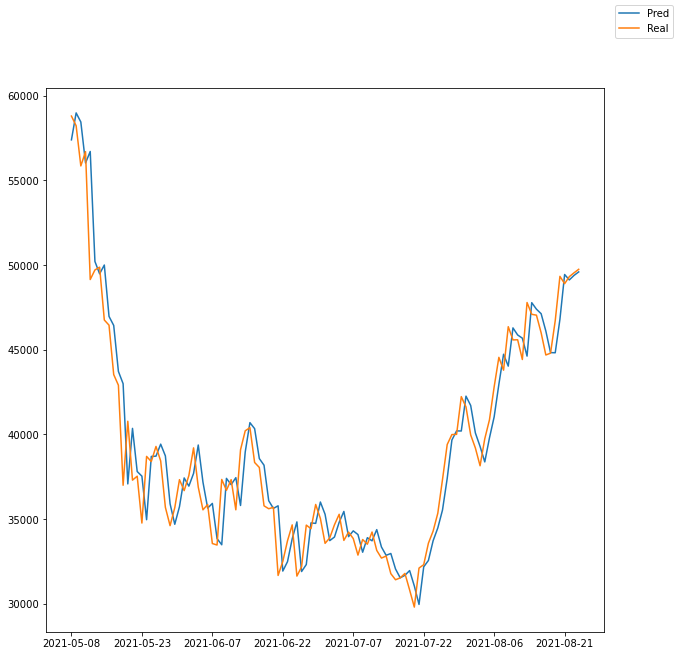

In [23]:
fig , ax = plt.subplots(figsize=(10,10))
ax.plot(X_test['Date'],predictions,label='Pred')
ax.plot(X_test['Date'],y_test,label="Real")
ax.set_xticks(ax.get_xticks()[::15])
fig.legend()

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 1333.8935710932788


In [27]:
(metrics.mean_absolute_error(y_test, predictions)/45000)*100

2.964207935762842

In [33]:
            # Open         Yesterday       2 days ago     3days ago
lm.predict([[46723.12 ,    46717.58 ,     44801.19,    44695.36]])

array([46801.48346119])

In [34]:
            # Open         Yesterday       2 days ago     3days ago
lm.predict([[44741.88,    44801.19,     44695.36,    46004.48]])

array([44826.25743126])